In [1]:

import pandas as pd
import pickle

# Load the datasets
ingr_map = pd.read_pickle("ingr_map.pkl")
raw_recipes = pd.read_csv("RAW_recipes.csv")
raw_interactions = pd.read_csv("RAW_interactions.csv")
pp_users = pd.read_csv("PP_users.csv")
pp_recipes = pd.read_csv("PP_recipes.csv")
interactions_validation = pd.read_csv("interactions_validation.csv")
interactions_train = pd.read_csv("interactions_train.csv")
interactions_test = pd.read_csv("interactions_test.csv")


# Show some basic information about each dataset
datasets = {
    'ingr_map': ingr_map,
    'raw_recipes': raw_recipes,
    'raw_interactions': raw_interactions,
    'pp_users': pp_users,
    'pp_recipes': pp_recipes,
    'interactions_validation': interactions_validation,
    'interactions_train': interactions_train,
    'interactions_test': interactions_test
}

info_dict = {}

for name, dataset in datasets.items():
    info_dict[name] = {
        'Number of Rows': dataset.shape[0],
        'Number of Columns': dataset.shape[1],
        'Columns': ', '.join(dataset.columns)
    }

info_df = pd.DataFrame(info_dict).T
info_df


,Number of Rows,Number of Columns,Columns
ingr_map,11659,7,"raw_ingr, raw_words, processed, len_proc, repl..."
raw_recipes,231637,12,"name, id, minutes, contributor_id, submitted, ..."
raw_interactions,1132367,5,"user_id, recipe_id, date, rating, review"
pp_users,25076,6,"u, techniques, items, n_items, ratings, n_ratings"
pp_recipes,178265,8,"id, i, name_tokens, ingredient_tokens, steps_t..."
interactions_validation,7023,6,"user_id, recipe_id, date, rating, u, i"
interactions_train,698901,6,"user_id, recipe_id, date, rating, u, i"
interactions_test,12455,6,"user_id, recipe_id, date, rating, u, i"


In [2]:
pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [3]:
ingr_map

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [4]:
interactions_train

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [5]:
raw_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [6]:
raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [7]:
# Calculate User-based Features
# 1. Average Rating Given by User
user_avg_rating = interactions_train.groupby('user_id')['rating'].mean().reset_index()
user_avg_rating.columns = ['user_id', 'avg_rating_user']

# 2. Number of Recipes Rated by User
user_num_ratings = interactions_train.groupby('user_id')['rating'].count().reset_index()
user_num_ratings.columns = ['user_id', 'num_ratings_user']

# Merge these features into a single user_features DataFrame
user_features = pd.merge(user_avg_rating, user_num_ratings, on='user_id')

# Calculate Recipe-based Features
# 1. Average Rating of Recipe
recipe_avg_rating = interactions_train.groupby('recipe_id')['rating'].mean().reset_index()
recipe_avg_rating.columns = ['recipe_id', 'avg_rating_recipe']

# 2. Number of Ratings Received by Recipe
recipe_num_ratings = interactions_train.groupby('recipe_id')['rating'].count().reset_index()
recipe_num_ratings.columns = ['recipe_id', 'num_ratings_recipe']

# Merge these features into a single recipe_features DataFrame
recipe_features = pd.merge(recipe_avg_rating, recipe_num_ratings, on='recipe_id')

# Show first few rows of user_features and recipe_features
user_features.head(), recipe_features.head()


(   user_id  avg_rating_user  num_ratings_user
 0     1533         4.747826               115
 1     1535         4.476117               649
 2     1634         3.875000                48
 3     1676         4.583333                24
 4     1773         4.500000                 2,
    recipe_id  avg_rating_recipe  num_ratings_recipe
 0         38           4.333333                   3
 1         40           4.800000                   5
 2         45           4.000000                   2
 3         46           5.000000                   2
 4         49           4.000000                  12)

In [8]:
from collections import Counter

# Convert the string representation of tags into a list
raw_recipes['tags'] = raw_recipes['tags'].apply(eval)

# Flatten the list of tags and count the occurrences of each tag
all_tags = [tag for sublist in raw_recipes['tags'].tolist() for tag in sublist]
tag_counts = Counter(all_tags)

# Sort tags by frequency
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Show top 30 most frequent tags to identify potential cuisine-related tags
sorted_tags[:30]


[('preparation', 230546),
 ('time-to-make', 225326),
 ('course', 218148),
 ('main-ingredient', 170446),
 ('dietary', 165091),
 ('easy', 126062),
 ('occasion', 114145),
 ('cuisine', 91165),
 ('low-in-something', 85776),
 ('main-dish', 71786),
 ('equipment', 70436),
 ('60-minutes-or-less', 69990),
 ('number-of-servings', 58949),
 ('meat', 56042),
 ('30-minutes-or-less', 55077),
 ('vegetables', 53814),
 ('taste-mood', 52143),
 ('4-hours-or-less', 49497),
 ('north-american', 48479),
 ('3-steps-or-less', 44933),
 ('15-minutes-or-less', 43934),
 ('low-sodium', 43349),
 ('desserts', 43203),
 ('low-carb', 42189),
 ('healthy', 40340),
 ('dinner-party', 37561),
 ('low-cholesterol', 36743),
 ('low-calorie', 36429),
 ('vegetarian', 35651),
 ('beginner-cook', 35561)]

In [9]:
# Filter recipes that have 'cuisine' in their tags
cuisine_recipes = raw_recipes[raw_recipes['tags'].apply(lambda x: 'cuisine' in x)]

# Flatten the list of tags for these recipes and count the occurrences of each tag
cuisine_tags = [tag for sublist in cuisine_recipes['tags'].tolist() for tag in sublist]
cuisine_tag_counts = Counter(cuisine_tags)

# Sort tags by frequency
sorted_cuisine_tags = sorted(cuisine_tag_counts.items(), key=lambda x: x[1], reverse=True)

# Show top 30 most frequent tags within recipes tagged with 'cuisine'
sorted_cuisine_tags[:30]


[('cuisine', 91165),
 ('preparation', 90843),
 ('time-to-make', 89005),
 ('course', 87998),
 ('main-ingredient', 77556),
 ('dietary', 69384),
 ('occasion', 58720),
 ('easy', 50730),
 ('north-american', 48478),
 ('main-dish', 35348),
 ('low-in-something', 34364),
 ('equipment', 33620),
 ('american', 31179),
 ('taste-mood', 30139),
 ('60-minutes-or-less', 28033),
 ('meat', 27278),
 ('vegetables', 26507),
 ('european', 24912),
 ('30-minutes-or-less', 21857),
 ('number-of-servings', 21757),
 ('dinner-party', 21709),
 ('4-hours-or-less', 20865),
 ('vegetarian', 19195),
 ('low-carb', 18236),
 ('holiday-event', 17878),
 ('inexpensive', 17524),
 ('low-sodium', 17104),
 ('beginner-cook', 16158),
 ('healthy', 15609),
 ('3-steps-or-less', 15478)]

In [10]:
# Identify a set of tags that are indicative of cuisines
cuisine_tags_set = {'north-american', 'american', 'european', 'asian', 'mexican', 'italian', 'french', 'indian', 'chinese', 'japanese'}

# Filter the raw_recipes to only include recipes with these cuisine tags
cuisine_filtered_recipes = raw_recipes[raw_recipes['tags'].apply(lambda x: any(tag in x for tag in cuisine_tags_set))]

# Merge this with interactions_train to get user interactions with these cuisine-tagged recipes
user_cuisine_interactions = pd.merge(interactions_train, cuisine_filtered_recipes, left_on='recipe_id', right_on='id', how='inner')

# Initialize an empty dictionary to store user preferences
user_cuisine_preferences = {}


# Create a function to identify cuisine tags in a list of tags
def identify_cuisine_tags(tag_list):
    return [tag for tag in tag_list if tag in cuisine_tags_set]

# Apply the function to the 'tags' column in the user_cuisine_interactions DataFrame
user_cuisine_interactions['cuisine_tags'] = user_cuisine_interactions['tags'].apply(identify_cuisine_tags)

# Unstack the list of cuisine_tags into separate rows
user_cuisine_interactions_unstacked = user_cuisine_interactions.explode('cuisine_tags')

# Calculate the average rating given by each user to each cuisine
user_cuisine_preferences_df = user_cuisine_interactions_unstacked.groupby(['user_id', 'cuisine_tags'])['rating'].mean().reset_index()
user_cuisine_preferences_df.rename(columns={'cuisine_tags': 'cuisine', 'rating': 'avg_rating_for_cuisine'}, inplace=True)

# Show the first few rows of the DataFrame
user_cuisine_preferences_df.head()


,user_id,cuisine,avg_rating_for_cuisine
0,1533,american,4.518519
1,1533,asian,5.000000
2,1533,european,4.727273
3,1533,indian,5.000000
4,1533,italian,5.000000


In [11]:
from scipy.sparse import coo_matrix

# Create a sparse user-item interaction matrix using COO (Coordinate) format
# Map user_id and recipe_id to row and column indices for sparse matrix
user_ids = interactions_train['user_id'].astype('category').cat.codes
recipe_ids = interactions_train['recipe_id'].astype('category').cat.codes

# Create the sparse matrix
sparse_user_item_matrix = coo_matrix((interactions_train['rating'], (user_ids, recipe_ids)))

# Show the shape of the sparse matrix to confirm the operation
sparse_shape = sparse_user_item_matrix.shape
sparse_shape


/Users/alancheung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(25076, 160901)

In [12]:
from sklearn.decomposition import TruncatedSVD

# Initialize Truncated SVD with the number of components as 50
svd = TruncatedSVD(n_components=50, random_state=42)

# Fit and transform the sparse user-item interaction matrix
reduced_matrix = svd.fit_transform(sparse_user_item_matrix)

# Show the shape of reduced matrix to confirm dimensionality reduction
reduced_matrix.shape


(25076, 50)

In [13]:
import numpy as np
# Convert the COO matrix to CSR format to support slicing
sparse_user_item_matrix_csr = sparse_user_item_matrix.tocsr()

# Sample a subset of users and items for faster computation
# Sample 10% of users and items
sampled_user_ids = np.random.choice(sparse_user_item_matrix_csr.shape[0], int(sparse_user_item_matrix_csr.shape[0] * 0.1), replace=False)
sampled_item_ids = np.random.choice(sparse_user_item_matrix_csr.shape[1], int(sparse_user_item_matrix_csr.shape[1] * 0.1), replace=False)

# Create a sub-matrix using the sampled indices
sampled_matrix = sparse_user_item_matrix_csr[sampled_user_ids, :][:, sampled_item_ids]

# Show the shape of the sampled matrix to confirm the operation
sampled_matrix.shape

(2507, 16090)

In [14]:
# Import the cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

# Compute User Similarity using cosine similarity
user_similarity = cosine_similarity(sampled_matrix)

# For demonstration, let's consider k = 5 for the top k similar users
k = 5

# Sort the users by similarity and select top k similar users for each user
top_k_users = np.argsort(user_similarity, axis=1)[:, -k-1:-1][:, ::-1]

# Initialize a matrix to store the predicted ratings
predicted_ratings = np.zeros(sampled_matrix.shape)

# Using a vectorized approach to compute predicted ratings for demonstration
# Here we're using only the diagonal of the similarity matrix to avoid full matrix multiplication for demonstration
predicted_ratings = user_similarity.dot(sampled_matrix.toarray()) / np.abs(user_similarity).sum(axis=1)[:, np.newaxis]

# Show the shape of the predicted ratings matrix to confirm the operation
predicted_ratings.shape


/var/folders/bg/hdj9jw_j33g1vg7x_rmvr9lc0000gn/T/ipykernel_11517/2731776377.py:18: RuntimeWarning: invalid value encountered in divide
  predicted_ratings = user_similarity.dot(sampled_matrix.toarray()) / np.abs(user_similarity).sum(axis=1)[:, np.newaxis]


(2507, 16090)

In [15]:
# Calculate the global mean rating from the original sampled matrix
global_mean_rating = sampled_matrix.sum() / sampled_matrix.count_nonzero()

# Replace NaN values in the predicted ratings matrix with the global mean rating
predicted_ratings[np.isnan(predicted_ratings)] = global_mean_rating

# Check again for NaN values to confirm they've been replaced
np.isnan(predicted_ratings).sum()


0

# Evaluating Model

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.sparse import coo_matrix, csr_matrix
import math
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Reload the interactions_train dataset
interactions_train = pd.read_csv('interactions_train.csv')

# Convert user_id and recipe_id to categorical types for proper mapping
interactions_train['user_id'] = interactions_train['user_id'].astype('category')
interactions_train['recipe_id'] = interactions_train['recipe_id'].astype('category')

# Now, let's try creating the sparse user-item interaction matrix for the test data again
# Map user_id and recipe_id to row and column indices for sparse matrix
# We'll use the same mapping as in the training set for consistency
test_user_ids = pd.Categorical(interactions_test['user_id'], categories=interactions_train['user_id'].cat.categories).codes
test_recipe_ids = pd.Categorical(interactions_test['recipe_id'], categories=interactions_train['recipe_id'].cat.categories).codes

In [18]:
# Filter out rows in the test set that contain user_ids or recipe_ids not present in the training set
filtered_test_indices = (interactions_test['user_id'].isin(interactions_train['user_id'])) & (interactions_test['recipe_id'].isin(interactions_train['recipe_id']))

# Create a filtered test dataframe
filtered_interactions_test = interactions_test[filtered_test_indices]

# Map user_id and recipe_id to row and column indices for sparse matrix
# We'll use the same mapping as in the training set for consistency
filtered_test_user_ids = pd.Categorical(filtered_interactions_test['user_id'], categories=interactions_train['user_id'].cat.categories).codes
filtered_test_recipe_ids = pd.Categorical(filtered_interactions_test['recipe_id'], categories=interactions_train['recipe_id'].cat.categories).codes

# Create the sparse user-item interaction matrix for filtered test data using COO (Coordinate) format
sparse_user_item_matrix_test = coo_matrix((filtered_interactions_test['rating'], (filtered_test_user_ids, filtered_test_recipe_ids)), shape=sparse_user_item_matrix.shape)

# Convert to CSR format to support slicing
sparse_user_item_matrix_test_csr = sparse_user_item_matrix_test.tocsr()

# Sample a subset of the test matrix for evaluation
# Sample 10% of users
sampled_test_user_ids = np.random.choice(sparse_user_item_matrix_test_csr.shape[0], int(sparse_user_item_matrix_test_csr.shape[0] * 0.1), replace=False)

# Create a sub-matrix using the sampled indices
sampled_test_matrix = sparse_user_item_matrix_test_csr[sampled_test_user_ids, :]

# Show the shape of the sampled test matrix
sampled_test_matrix.shape


(2507, 160901)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.sparse import coo_matrix, csr_matrix
import math

In [20]:
# Check the shapes of both matrices to ensure they are compatible for computing cosine similarity
sampled_test_matrix_shape = sampled_test_matrix.shape
sparse_user_item_matrix_csr_shape = sparse_user_item_matrix_csr.shape

sampled_test_matrix_shape, sparse_user_item_matrix_csr_shape


((2507, 160901), (25076, 160901))

In [21]:
# To predict ratings, we will use the user similarity matrix to weight the ratings from similar users in the training set.
epsilon = 1e-10  # A small value to prevent division by zero

sampled_user_similarity = cosine_similarity(sampled_test_matrix, sparse_user_item_matrix_csr)


# Step 1: Predict Ratings for Sampled Test Matrix
# We will compute predictions by taking the dot product of the user similarity matrix with the item (recipe) ratings.
# The global mean of the training ratings will be used to mean-center the ratings before prediction.
global_mean_train = sparse_user_item_matrix_csr.data.mean()
sampled_predictions = sampled_user_similarity.dot(sparse_user_item_matrix_csr.toarray() - global_mean_train) / (np.abs(sampled_user_similarity).sum(axis=1, keepdims=True) + epsilon)

# Add the global mean to the predictions to bring them back to the original rating scale
sampled_predictions += global_mean_train

# Step 2: Calculate Evaluation Metrics
# Flatten the matrices and compute the metrics, excluding known ratings from the true ratings matrix.
masked_true_ratings = sampled_test_matrix.toarray().copy()
masked_true_ratings[masked_true_ratings != 0] = np.nan  # Mask known ratings

# Flatten the true and predicted ratings for evaluation
true_ratings_flat = masked_true_ratings.flatten()
predicted_ratings_flat = sampled_predictions.flatten()

# Exclude NaN values from the true and predicted ratings for metric calculation
valid_mask = ~np.isnan(true_ratings_flat)
true_ratings_valid = true_ratings_flat[valid_mask]
predicted_ratings_valid = predicted_ratings_flat[valid_mask]

# Calculate RMSE and MAE
rmse_sampled = np.sqrt(mean_squared_error(true_ratings_valid, predicted_ratings_valid))
mae_sampled = mean_absolute_error(true_ratings_valid, predicted_ratings_valid)

rmse_sampled, mae_sampled


(4.574089892560804, 4.574089892558225)

# Feature Engineering to improve model - Content-based filtering

In [34]:
# Define a function to convert any lists to strings by joining with a space
def list_to_string(lst):
    return ' '.join(lst) if isinstance(lst, list) else lst

# Apply this function to the 'ingredients' and 'tags' column after filling NaN with empty strings
available_recipes['tags'] = available_recipes['tags'].fillna('').apply(list_to_string)
available_recipes['ingredients'] = available_recipes['ingredients'].fillna('').apply(list_to_string)

# Now concatenate the 'tags' and 'ingredients' columns
available_recipes['combined_features'] = available_recipes['tags'] + ' ' + available_recipes['ingredients']


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct the SettingWithCopyWarning by using .loc
available_recipes.loc[:, 'combined_features'] = available_recipes['tags'].fillna('') + ' ' + available_recipes['ingredients'].apply(list_to_string).fillna('')

# Create the TF-IDF matrix again without the warning
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(available_recipes['combined_features'])

# Show the shape of the TF-IDF matrix
tfidf_matrix.shape


(160901, 3884)

In [38]:
from scipy.sparse import csr_matrix

# First, we need to map the recipe IDs to the row indices of the TF-IDF matrix
recipe_id_to_index = {id: index for index, id in enumerate(available_recipes['id'])}

# Initialize a dictionary to store user profiles, which are the sum of TF-IDF vectors of recipes they interacted with
user_profiles = {}

# Loop through each user interaction
for index, interaction in interactions_train.iterrows():
    recipe_id = interaction['recipe_id']
    user_id = interaction['user_id']
    
    # Only consider interactions with recipes for which we have data
    if recipe_id in recipe_id_to_index:
        # Get the TF-IDF vector for the recipe
        recipe_index = recipe_id_to_index[recipe_id]
        recipe_vector = tfidf_matrix[recipe_index, :]
        
        # If the user has not been seen before, initialize their profile
        if user_id not in user_profiles:
            user_profiles[user_id] = csr_matrix(recipe_vector)
        else:
            # If we have seen the user, add the recipe vector to their profile
            user_profiles[user_id] += recipe_vector

# Convert user_profiles to csr_matrix for efficient calculations
for user_id in user_profiles:
    user_profiles[user_id] = user_profiles[user_id].tocsr()

# Now, let's print out the number of user profiles we have created
len(user_profiles)


25076

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

# Convert the user profiles to a sparse matrix if they are not already
user_profiles_sparse = sparse.vstack([sparse.csr_matrix(profile) for profile in user_profiles.values()])

# Convert the TF-IDF matrix to a sparse matrix if it's not already
tfidf_matrix_sparse = sparse.csr_matrix(tfidf_matrix)

# Determine the batch size based on your system's capabilities
batch_size = 100  # for example, process 100 user profiles at a time

user_recommendations = {}

# Process in batches
for start_index in range(0, user_profiles_sparse.shape[0], batch_size):
    end_index = min(start_index + batch_size, user_profiles_sparse.shape[0])
    batch_user_profiles = user_profiles_sparse[start_index:end_index]

    # Compute similarities for the batch
    batch_similarities = cosine_similarity(batch_user_profiles, tfidf_matrix_sparse)

    # Extract recommendations for each user in the batch
    for batch_index, similarities in enumerate(batch_similarities):
        user_id = list(user_profiles.keys())[start_index + batch_index]
        
        # Get the top 5 similar recipe indices
        top_indices = similarities.argsort()[-5:][::-1]
        
        # Map back the indices to recipe IDs
        recommended_recipe_ids = [available_recipes.iloc[i]['id'] for i in top_indices]
        
        # Store the recommendations for the user
        user_recommendations[user_id] = recommended_recipe_ids

# Now user_recommendations contains all the user recommendations


In [50]:
# Let's display the recommendations for the first few users to see what they look like
for user_id in list(user_recommendations)[:5]:
    print(f"User {user_id} recommendations: {user_recommendations[user_id]}")


User 2046 recommendations: [517, 3431, 4684, 13307, 40292]
User 1773 recommendations: [278, 7435, 135675, 16713, 16309]
User 2312 recommendations: [167475, 120717, 168140, 22829, 15038]
User 2625 recommendations: [4214, 4244, 471, 4243, 100269]
User 2999 recommendations: [252517, 3567, 99416, 182080, 389492]


In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Define k
k = 5

# Initialize lists to store precision and recall for each user
precisions = []
recalls = []

# Calculate precision and recall for each user
for user_id, recommended_recipes in user_recommendations.items():
    # Get the actual recipes the user has interacted with
    actual_recipes = interactions_test[interactions_test['user_id'] == user_id]['recipe_id'].values
    # Initialize binary vectors for actual and recommended recipes
    y_true = [1 if recipe_id in actual_recipes else 0 for recipe_id in recommended_recipes]
    y_pred = [1]*k  # We recommended k items, so predicting 1 for all
    
    # Calculate precision and recall for this user
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    
    # Append to our lists
    precisions.append(precision)
    recalls.append(recall)

# Calculate the average precision and recall across all users
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Calculate F1 score
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precisions, recalls)]
avg_f1_score = np.mean(f1_scores)

avg_precision, avg_recall, avg_f1_score


(0.0, 0.0, 0.0)

In [54]:
len(user_recommendations)

25076

In [53]:
import pandas as pd

# Get unique user IDs from the training set
train_user_ids = set(interactions_train['user_id'].unique())

# Get unique user IDs from the test set
test_user_ids = set(interactions_test['user_id'].unique())

# Find the intersection of the two sets
common_user_ids = train_user_ids.intersection(test_user_ids)

# Check the number of common users
num_common_users = len(common_user_ids)

print(f"There are {num_common_users} users that appear in both the training and test sets.")


There are 12455 users that appear in both the training and test sets.


In [55]:
interactions_train

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [56]:
interactions_test

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


# Model with K-means Clustering

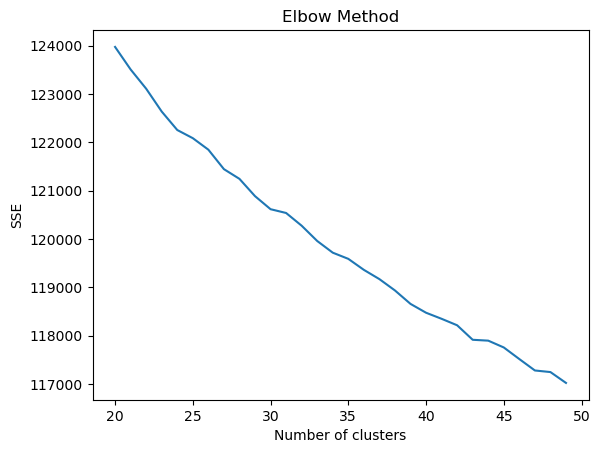

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sse = {}
for k in range(20, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


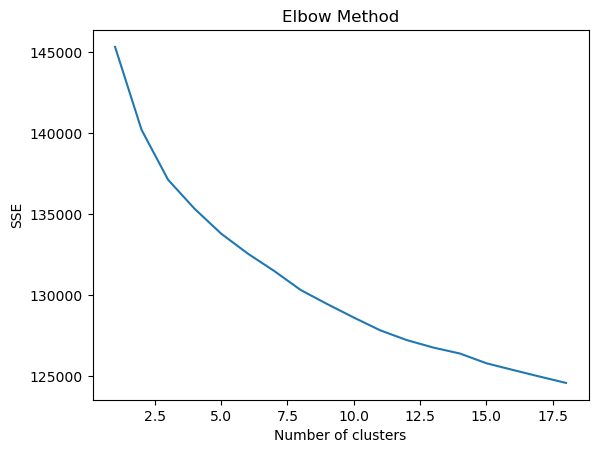

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sse = {}
for k in range(1, 19):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


In [63]:
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 10

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign the cluster labels to your original dataframe
available_recipes['cluster'] = kmeans.labels_


In [64]:
# Check the size of each cluster
available_recipes['cluster'].value_counts()

# Optionally, inspect the centroid terms of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {top_terms}")


Cluster 0: ['pasta', 'rice', 'grains', 'cheese', 'main', 'dish', 'pepper', 'low', 'ingredient', 'fresh']
Cluster 1: ['low', 'healthy', 'fat', 'cholesterol', 'calorie', 'saturated', 'protein', 'sodium', 'dietary', 'carb']
Cluster 2: ['cheese', 'eggs', 'dairy', 'low', 'main', 'cream', 'cheddar', 'minutes', 'american', 'pepper']
Cluster 3: ['breads', 'baking', 'flour', 'sugar', 'powder', 'soda', 'quick', 'eggs', 'salt', 'milk']
Cluster 4: ['pepper', 'fresh', 'main', 'oil', 'salt', 'garlic', 'minutes', 'make', 'time', 'preparation']
Cluster 5: ['chicken', 'poultry', 'breasts', 'low', 'meat', 'main', 'dish', 'boneless', 'skinless', 'pepper']
Cluster 6: ['beef', 'ground', 'meat', 'dish', 'main', 'low', 'sauce', 'onion', 'pepper', 'ingredient']
Cluster 7: ['cookies', 'brownies', 'desserts', 'sugar', 'chocolate', 'baking', 'flour', 'vanilla', 'butter', 'bar']
Cluster 8: ['pork', 'chops', 'meat', 'low', 'main', 'dish', 'sausage', 'pepper', 'sauce', 'ingredient']
Cluster 9: ['desserts', 'sugar',

In [65]:
# Function to recommend recipes from the same cluster
def recommend_recipes(recipe_id, available_recipes, num_recommendations=5):
    # Find the cluster to which the recipe belongs
    cluster = available_recipes.loc[available_recipes['id'] == recipe_id, 'cluster'].iloc[0]
    
    # Find other recipes in the same cluster
    similar_recipes = available_recipes[available_recipes['cluster'] == cluster]
    
    # If there are enough recipes in the cluster, recommend randomly
    if len(similar_recipes) > num_recommendations:
        return similar_recipes.sample(num_recommendations)['id'].tolist()
    else:
        # Not enough recipes to recommend, return what's available
        return similar_recipes['id'].tolist()


In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(recipe_features)

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Find the number of clusters that gives the highest silhouette score
silhouette_scores = []
for i in range(2, 15):  # silhouette score can't be calculated for cluster number 1
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Let's find the optimal number of clusters based on silhouette scores
optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 because range starts at 2

# Now applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Let's add the cluster labels back to our original DataFrame
recipe_features['cluster'] = cluster_labels

# Output the head of the dataframe to verify
recipe_features.head(), optimal_clusters, silhouette_scores


(   recipe_id  avg_rating_recipe  num_ratings_recipe  cluster
 0         38           4.333333                   3        1
 1         40           4.800000                   5        1
 2         45           4.000000                   2        1
 3         46           5.000000                   2        1
 4         49           4.000000                  12        1,
 5,
 [0.37060360616072374,
  0.42097628954683525,
  0.43341323436476437,
  0.439828964423259,
  0.41714668258892057,
  0.34939597258381777,
  0.36522956393958317,
  0.39555990499685206,
  0.3999834905506025,
  0.4057329092647593,
  0.37319244051927924,
  0.3795625747063881,
  0.38567562224646706])

In [71]:
user_preferences = (
    interactions_train.groupby('user_id')['recipe_id']
    .apply(list)
    .to_dict()
)

In [72]:
# Let's assume 'recipe_features' is a DataFrame that includes a 'recipe_id' column and a 'cluster' column 
# where each recipe ID is associated with a cluster number from the k-means algorithm.

recipe_clusters = (
    recipe_features.set_index('recipe_id')['cluster']
    .to_dict()
)


In [74]:
# Let's assume 'user_preferences' is a dictionary containing user IDs as keys and lists of recipe IDs they like as values.
# And 'recipe_clusters' is a dictionary with recipe IDs as keys and their corresponding cluster numbers as values.
n_clusters = optimal_clusters

# Step 1: Profile Users Based on Clusters
user_profiles = {}
for user_id, recipe_ids in user_preferences.items():
    user_profile = [0] * n_clusters  # n_clusters is the number of clusters from k-means
    for recipe_id in recipe_ids:
        cluster = recipe_clusters[recipe_id]
        user_profile[cluster] += 1  # Increment the count for the cluster
    user_profiles[user_id] = user_profile

# Step 2: Make Recommendations
user_recommendations = {}
for user_id, user_profile in user_profiles.items():
    # Find the user's top cluster preferences
    top_clusters = np.argsort(user_profile)[::-1]  # Sort clusters by preference
    
    # Get recipes from the top clusters that the user hasn't seen/rated yet
    recommendations = []
    for cluster in top_clusters:
        cluster_recipes = [recipe_id for recipe_id, cluster_num in recipe_clusters.items() if cluster_num == cluster]
        unseen_recipes = set(cluster_recipes) - set(user_preferences[user_id])
        recommendations.extend(list(unseen_recipes))
    
    # Store the recommendations, you can limit the number of recommendations if needed
    user_recommendations[user_id] = recommendations[:10]  # Let's say we recommend top 10 recipes

# Now you have a dictionary 'user_recommendations' with user IDs as keys and lists of recommended recipe IDs as values.


In [77]:
user_recommendations

{1533: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1535: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1634: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1676: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1773: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1792: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1891: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 1962: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2046: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2059: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2148: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2178: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2310: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2312: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2369: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2525: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2555: [131080,
  327695,
  229393,
  98323,
  65559,
  98327,
  262171,
  196637,
  163871,
  360480],
 2586: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2595: [38, 40, 45, 46, 49, 52, 58, 59, 62, 63],
 2625: [38, 40

KeyError: 7422